## Perguntas - GDP Per Person (1901-2011)

In [118]:
import pandas as pd
import numpy as np

In [119]:
# import table
df_gdp = pd.read_csv("Datasets/gdp.csv")

In [120]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


In [121]:
# - Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.
# possivelmente dados Year eh string => dtype: object
df_gdp["Year"]



0       1/1/1901
1       1/1/1906
2       1/1/1911
3       1/1/1916
4       1/1/1921
          ...   
4414    1/1/1991
4415    1/1/1996
4416    1/1/2001
4417    1/1/2006
4418    1/1/2011
Name: Year, Length: 4419, dtype: object

In [122]:
# para ver o primeiro elemento ele vai estar com `` => '1/1/1901' => type => 
str
type(df_gdp["Year"].iloc[0])


str

In [123]:
# para iniciar a limpeza usamos o split
# retorna uma lista ("/")[-1] me interessa o ultimo elemento que eh o ano, seja inteiro
# vai retornar uma Series com todos os numetos inteiros
df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))


0       1901
1       1906
2       1911
3       1916
4       1921
        ... 
4414    1991
4415    1996
4416    2001
4417    2006
4418    2011
Name: Year, Length: 4419, dtype: int64

In [124]:
# subscrever a coluna Year e executar
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [125]:
type(df_gdp["Year"].iloc[0])

numpy.int64

In [126]:
# name das colunas (tem espaco, e eh preciso ver direitinho como esta escrito)
# ' GDP_pp '
df_gdp.columns

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')

In [127]:
# ver o tipo de dado da coluna
type(df_gdp[" GDP_pp "].iloc[0])

str

In [128]:
df_gdp[" GDP_pp "].iloc[0]

' 613.99 '

In [129]:
df_gdp[" GDP_pp "].iloc[0].split(" ") # retorna 3 valores => ['', '613.99', '']

#float(df_gdp[" GDP_pp "].iloc[0].split()p[0])

['', '613.99', '']

In [130]:
# nao passar o parametro
df_gdp[" GDP_pp "].iloc[0].split() # retorna apenas uma lista com um valor

['613.99']

In [131]:
# pegar o valor 0
df_gdp[" GDP_pp "].iloc[0].split()[0]

'613.99'

In [132]:
# converter para float
float(df_gdp[" GDP_pp "].iloc[0].split()[0])

613.99

In [133]:
# criar uma nova Serie sem perder a outra
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0]))

#  ValueError: could not convert string to float: '1,030.89'
# series com outros tipos de dados de , e ponto .

ValueError: could not convert string to float: '1,030.89'

In [134]:
# trab o . e a , da serie
# df_gdp["gdp_pp"] = 
df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0]))


ValueError: could not convert string to float: '1,030.89'

In [135]:
# criar outra celula para tratar esse caso '1,030.89'
# substituir um valor por outro, mostrando os valores, vou subst uma , por nada ""
# ao executar a mesma string sem a , => '1030.89'
'1,030.89' .replace(",", "")

'1030.89'

In [136]:
# substituir os valores da ,
# df_gdp["gdp_pp"] = 
df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0].replace(",", "")))

0       613.99
1       624.04
2       634.25
3       647.28
4       662.40
         ...  
4414    782.09
4415    781.50
4416    719.96
4417    520.17
4418    526.33
Name:  GDP_pp , Length: 4419, dtype: float64

In [137]:
# substituir os valores da , => serei limpa
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0].replace(",", "")))

In [138]:
df_gdp.head(20)

,Country,Region,Year,GDP_pp,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,662.40
5,Afghanistan,"Middle East, North Africa, and Greater Arabia",1926,677.87,677.87
6,Afghanistan,"Middle East, North Africa, and Greater Arabia",1931,693.71,693.71
7,Afghanistan,"Middle East, North Africa, and Greater Arabia",1936,709.91,709.91
8,Afghanistan,"Middle East, North Africa, and Greater Arabia",1941,726.49,726.49
9,Afghanistan,"Middle East, North Africa, and Greater Arabia",1946,743.46,743.46


In [139]:
# deletar a coluna que nao importa mais com , e string GDP_pp
del df_gdp[" GDP_pp "]


In [140]:
df_gdp.head(20)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
5,Afghanistan,"Middle East, North Africa, and Greater Arabia",1926,677.87
6,Afghanistan,"Middle East, North Africa, and Greater Arabia",1931,693.71
7,Afghanistan,"Middle East, North Africa, and Greater Arabia",1936,709.91
8,Afghanistan,"Middle East, North Africa, and Greater Arabia",1941,726.49
9,Afghanistan,"Middle East, North Africa, and Greater Arabia",1946,743.46


In [141]:
# conjunto de dados Limpo, sem os pontos ou outro dado sem importancia para trab a tabela
df_gdp.head(20)

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
5,Afghanistan,"Middle East, North Africa, and Greater Arabia",1926,677.87
6,Afghanistan,"Middle East, North Africa, and Greater Arabia",1931,693.71
7,Afghanistan,"Middle East, North Africa, and Greater Arabia",1936,709.91
8,Afghanistan,"Middle East, North Africa, and Greater Arabia",1941,726.49
9,Afghanistan,"Middle East, North Africa, and Greater Arabia",1946,743.46


In [142]:
# com DF em maos limpo agora responder as perguntas

# - Você conseguiria informar o primeiro valor registrado de cada país?
# encontrar a menor ocorrencia por pais
# fazer um groupby entre colunas

df_gdp.groupby("Country").min()

,Region,Year,gdp_pp
Country,,,
Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,595.04
Albania,Europe,1901,1062.01
Algeria,"Middle East, North Africa, and Greater Arabia",1901,1807.76
Andorra,Europe,1901,3352.50
Angola,Sub-Saharan Africa,1901,525.76
...,...,...,...
Venezuela,South America,1901,766.21
Vietnam,Asia,1901,572.96
"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1901,729.39


In [143]:
type(df_gdp)


pandas.core.frame.DataFrame

In [144]:
# agora acessar a coluna Year, min
df_gdp.groupby("Country")["Year"].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [145]:
# ver qdo comecaram os paises, max
df_gdp.groupby("Country")["Year"].min().max()


np.int64(1991)

In [146]:
# que pais eh esse e que outras datas diferentes existem
df_gdp.groupby("Country")["Year"].min().value_counts()

Year
1901    192
1991      1
Name: count, dtype: int64

In [147]:
# que pais eh esse: Fazer uma selecao no DF para ver que pais eh esse
df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min() == 1991]


Country
Kosovo    1991
Name: Year, dtype: int64

In [148]:
# preciso saber que data eh essa, a ultima data, antes da virada do seculo,
# pega o valor maximo para essa ocorrencia => 1996
df_gdp[df_gdp["Year"] < 1999].max()



Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
gdp_pp               118681.3
dtype: object

In [149]:
# - Informe as regiões com maiores crescimentos de PIB per capita no século passado.
# separa em dois DF, primeira ocorrencia e da ultima ocorrencia
# selecionar os paises no ano de 1901
# DF

# Selecionar os países no ano de 1901
df_gdp_start = df_gdp[df_gdp["Year"] == 1901]

# Selecionar os países no ano de 1996
df_gdp_end = df_gdp[df_gdp["Year"] == 1996]


In [150]:
# primeiro faz um agrupamento por regiao
df_gdp_end


,Country,Region,Year,gdp_pp
19,Afghanistan,"Middle East, North Africa, and Greater Arabia",1996,617.91
42,Albania,Europe,1996,3569.59
65,Algeria,"Middle East, North Africa, and Greater Arabia",1996,4824.21
88,Andorra,Europe,1996,25839.07
111,Angola,Sub-Saharan Africa,1996,2157.35
...,...,...,...,...
4323,Venezuela,South America,1996,9725.53
4346,Vietnam,Asia,1996,1300.38
4369,"Yemen, Rep.","Middle East, North Africa, and Greater Arabia",1996,2022.93
4392,Zambia,Sub-Saharan Africa,1996,1060.55


In [151]:
# calcular a media, entre os paises e multip por 100%
df_gdp_end.groupby("Region") ["gdp_pp"].mean() / df_gdp_start.groupby("Region") ["gdp_pp"].mean()



Region
Asia                                             8.117615
Australia and Oceania                            4.960754
Central America and the Caribbean                5.064268
Europe                                           6.940462
Middle East, North Africa, and Greater Arabia    9.572159
North America                                    6.897602
South America                                    4.121237
Sub-Saharan Africa                               3.486338
Name: gdp_pp, dtype: float64

In [152]:
# calcular a media, entre os paises e multip por 100%
(df_gdp_end.groupby("Region") ["gdp_pp"].mean() / df_gdp_start.groupby("Region") ["gdp_pp"].mean()) * 100
# PIB percapta por regioes => Asia 811.761516

Region
Asia                                             811.761516
Australia and Oceania                            496.075383
Central America and the Caribbean                506.426789
Europe                                           694.046167
Middle East, North Africa, and Greater Arabia    957.215950
North America                                    689.760175
South America                                    412.123735
Sub-Saharan Africa                               348.633780
Name: gdp_pp, dtype: float64

In [153]:
# - Informe as regiões com maiores crescimentos de PIB per capita no século passado.

# ordenar os valores
((df_gdp_end.groupby("Region") ["gdp_pp"].mean() / df_gdp_start.groupby("Region") ["gdp_pp"].mean()) * 100).sort_values()

Region
Sub-Saharan Africa                               348.633780
South America                                    412.123735
Australia and Oceania                            496.075383
Central America and the Caribbean                506.426789
North America                                    689.760175
Europe                                           694.046167
Asia                                             811.761516
Middle East, North Africa, and Greater Arabia    957.215950
Name: gdp_pp, dtype: float64

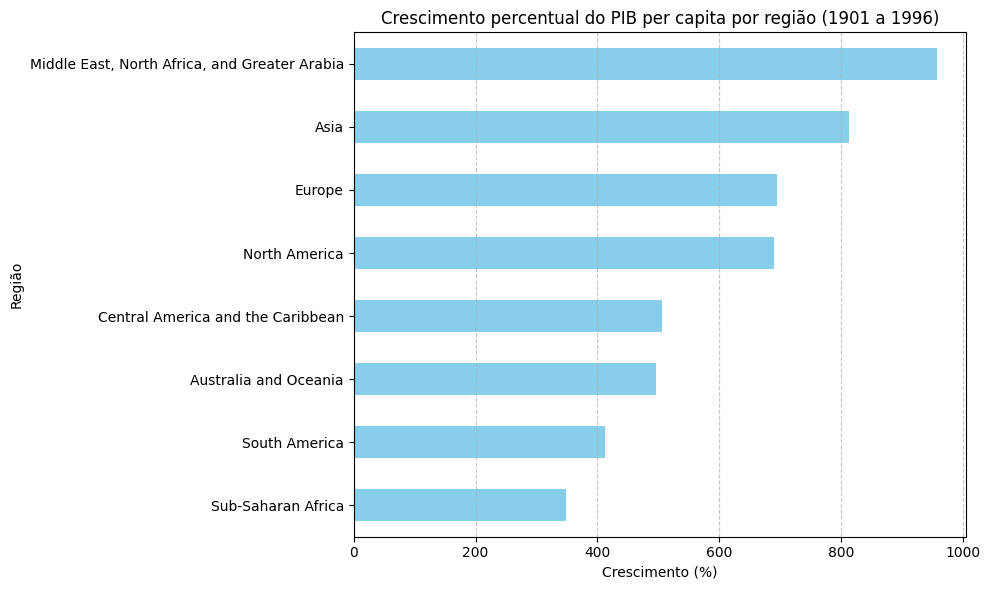

In [154]:
# - Informe as regiões com maiores crescimentos de PIB per capita no século passado. Com grafico

import matplotlib.pyplot as plt

# Calcular o crescimento percentual do PIB per capita por região
gdp_growth_by_region = (
    (df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean()) * 100
).sort_values()

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
gdp_growth_by_region.plot(kind="barh", color="skyblue")
# kind="barh" para um gráfico de barras horizontal (mais legível com nomes longos de regiões).

plt.title("Crescimento percentual do PIB per capita por região (1901 a 1996)")
#Se quiser em ordem decrescente: .sort_values(ascending=False)

plt.xlabel("Crescimento (%)")
plt.ylabel("Região")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [155]:
# - Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.
# ver a diferenca para o proximo ano
df_gdp


,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [156]:
# para iniciar precisa de uma lista => # - Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.
# primeiro cria uma lista dos anos subsequentes, depois cria variacoes ano a ano, 
# array Year, usando a funcao np => inicianliza no primeiro ano e fim no ultimo

arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())



In [157]:
arr_year # todos os anos nao esta incluido 2011

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [158]:
# proximo passo, remover os anos que nao estao no array
# primeiro tem que converter  => arr_year em series => EM FORMAT DF
df_all_years = pd.DataFrame(arr_year, columns=["Year"])

In [159]:
df_all_years # SERIES => EM FORMAT DF

,Year
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
105,2006
106,2007
107,2008
108,2009


In [160]:
# vamos usar uma funcoa que vai remover os valores que nao quer
# definir como indice, duplicando os valores
df_all_years.index = df_all_years["Year"]

In [161]:
# agora criar um DF => sao anos de lacuna no DF original
df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"])
# ~ => vai retornar os valores tru, nao tem  => 1902     True => onde tem dados
# ~  e a funcao asin que fornecem esses dados


In [162]:
df_years_off

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [163]:
# redefinindo valores e querendo apenas indices
df_years_off = df_all_years.loc[df_years_off].index
# vai aparecer uma lista com todos anos que preciso adicionar
# df_years_off

In [164]:
df_years_off

Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914, 1915,
       1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928, 1929, 1930,
       1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942, 1943, 1944, 1945,
       1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1957, 1958, 1959, 1960,
       1962, 1963, 1964, 1965, 1967, 1968, 1969, 1970, 1972, 1973, 1974, 1975,
       1977, 1978, 1979, 1980, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990,
       1992, 1993, 1994, 1995, 1997, 1998, 1999, 2000, 2002, 2003, 2004, 2005,
       2007, 2008, 2009, 2010],
      dtype='int64', name='Year')

In [165]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [166]:
# ordernar o DF de forma correta, por Year e depois Country
df_gdp = df_gdp.sort_values(["Country", "Year"])

In [167]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [168]:
# calcular o gdp no intervalo de tempo
df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)

In [169]:
df_gdp # # calcular o gdp no intervalo de tempo e qtos anos se passaram => 10.05	5.0

,Country,Region,Year,gdp_pp,delta_gdp,delta_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0


In [170]:
# fazer o calculo por ano, taxa calculada ano a ano
df_gdp["gdp_year"] = df_gdp["delta_gdp"] / df_gdp["delta_year"]

In [171]:
# qtos subiu ano a ano
df_gdp #  gdp_year => 2.010

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.010
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.042
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,2.606
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.024
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,7.958
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-0.118
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-12.308
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,-39.958


In [172]:
# subir para a linha correta, # fazer o calculo por ano, taxa calculada ano a ano
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)

In [173]:
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [174]:
# interacao dos dados e add no DF
# add more series and delete series not use
df_gdp["next_year"] = df_gdp["Year"].shift(-1)


In [175]:
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094,1926.0
...,...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118,1996.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308,2001.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958,2006.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232,2011.0


In [176]:
# delete no user series
del df_gdp["delta_gdp"], df_gdp["delta_year"]

In [177]:
df_gdp.head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


In [178]:
# new DF para interacao de concat
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue

    # caso false continue
    #new variavel, years reais
    year_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]

    break   
    


In [179]:
# ver a linha
row

Country                                        Afghanistan
Region       Middle East, North Africa, and Greater Arabia
Year                                                  1901
gdp_pp                                              613.99
gdp_year                                              2.01
next_year                                           1906.0
Name: 0, dtype: object

In [180]:
# ver a variavel
year_to_add

Index([1902, 1903, 1904, 1905], dtype='int64', name='Year')

In [181]:
# converter o row para DF para trab com dados, para func o passo for (3)
row.to_frame().transpose()

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0


In [182]:
# Segundo for (acima para ver as informacoes, continuacao abaixo)

# new DF para interacao de concat
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows(): # iterrows eh mais didatico so que eh mais pesado para rodar
    if row["Year"] == 2011:
        continue

    # caso false continue
    #new variavel, years reais
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]

    # segundo for start aqui, add um a um (ano a ano....1902, 1903, 1904, 1905)
    for new_year in years_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]  # comeca a trab a estimativa gdp_pp
        add_row["Year"] = new_year
        add_row["kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

    

In [183]:
# resposta
df_new_data # gdp_pp => gdp_pp (PIB per capita)

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


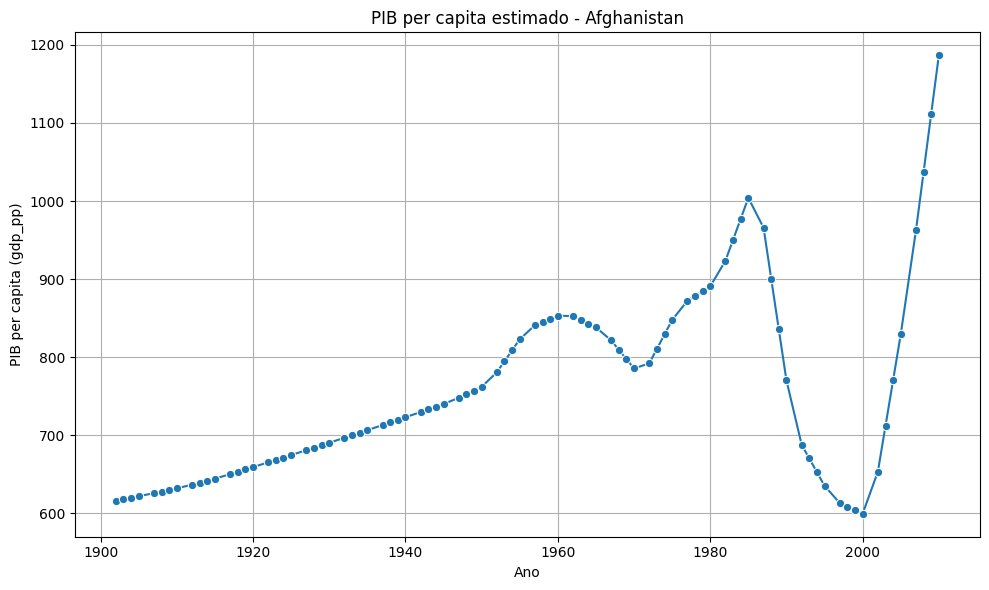

In [184]:
#  montar todos com grafico (CHATGPT)
# 1 - gerar um gráfico com base nesses dados interpolados (df_new_data)
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar os dados para um país (ex: Afghanistan)
df_afghanistan = df_new_data[df_new_data["Country"] == "Afghanistan"].sort_values("Year")

# Plotar a linha de crescimento estimado do PIB per capita
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_afghanistan, x="Year", y="gdp_pp", marker="o")

plt.title("PIB per capita estimado - Afghanistan")
plt.xlabel("Ano")
plt.ylabel("PIB per capita (gdp_pp)")
plt.grid(True)
plt.tight_layout()
plt.show()


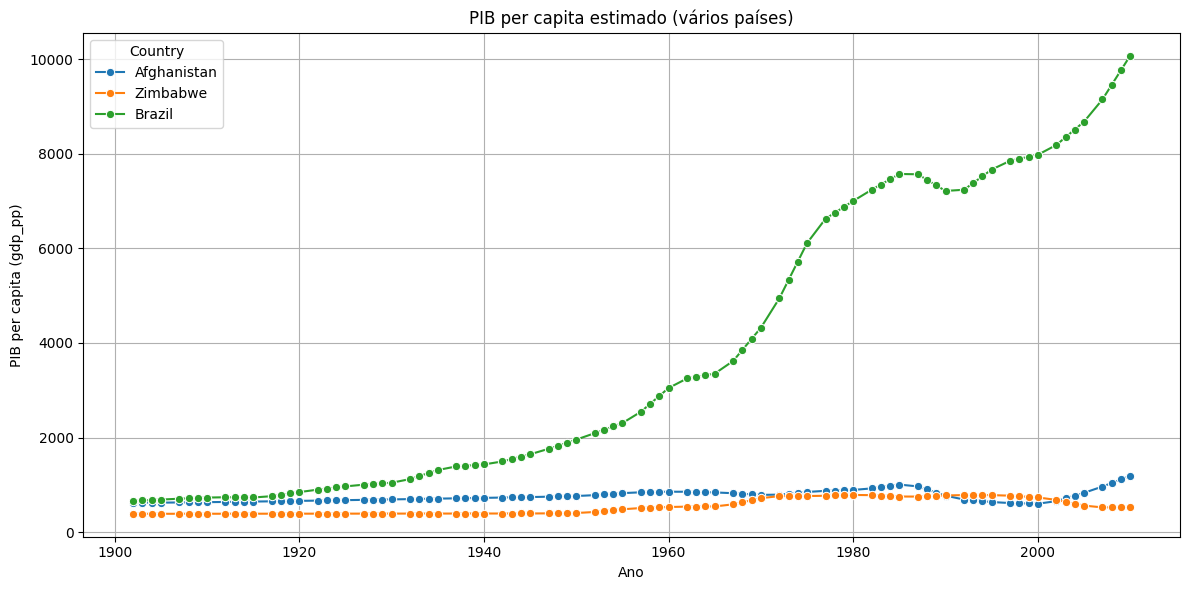

In [185]:
#  montar todos com grafico (CHATGPT)
# 2 - Comparar múltiplos países no mesmo gráfico, Útil se você quiser ver a evolução de 3–5 países ao longo do tempo. Evite muitos para não ficar poluído.

# Filtrar um subconjunto de países
paises = ["Afghanistan", "Brazil", "Zimbabwe"]

df_subset = df_new_data[df_new_data["Country"].isin(paises)].sort_values("Year")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_subset, x="Year", y="gdp_pp", hue="Country", marker="o")

plt.title("PIB per capita estimado (vários países)")
plt.xlabel("Ano")
plt.ylabel("PIB per capita (gdp_pp)")
plt.grid(True)
plt.tight_layout()
plt.show()


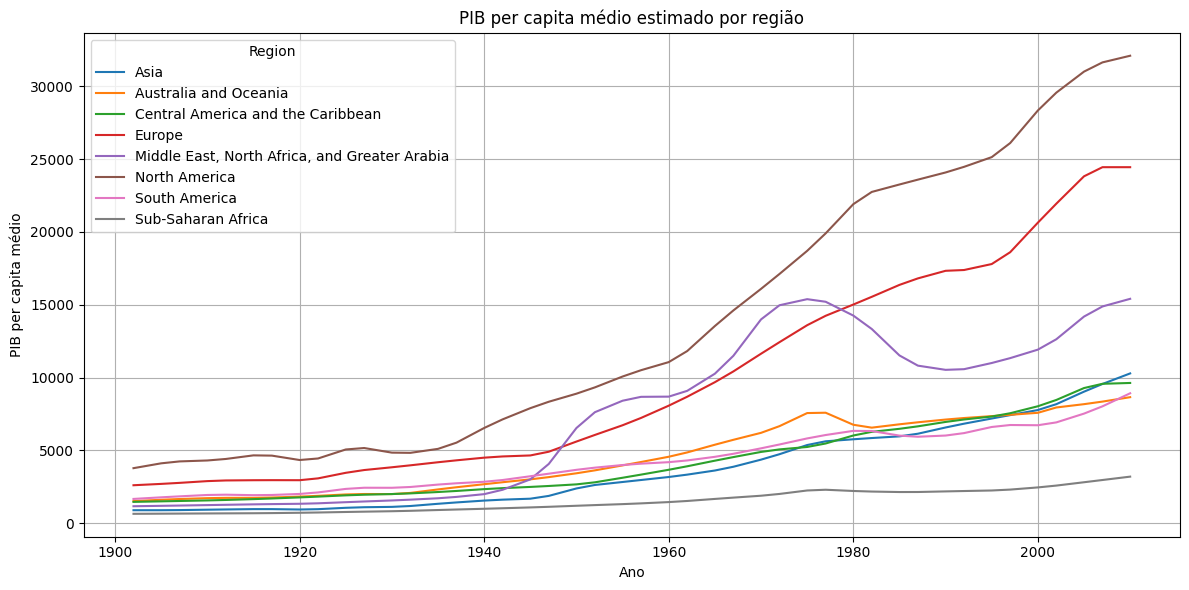

In [103]:
#  montar todos com grafico (CHATGPT)
# 3 - Evolução média por região
# Calcular média anual por região
df_region_avg = df_new_data.groupby(["Region", "Year"])["gdp_pp"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_region_avg, x="Year", y="gdp_pp", hue="Region")

plt.title("PIB per capita médio estimado por região")
plt.xlabel("Ano")
plt.ylabel("PIB per capita médio")
plt.grid(True)
plt.tight_layout()
plt.show()


In [186]:
# projec comb valores e fazer estimativas com os valores do PIB
df_new_data


,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [187]:
# fazer concat com os dados (insercao)
df_gdp = pd.concat([df_gdp, df_new_data])

In [188]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,NaN
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,NaN
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,NaN
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,NaN
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [189]:
# ordenar, primeiro ano e depois pais
df_gdp.sort_values(["Country", "Year"], inplace=True)

In [190]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2010,525.098,1.232,2011.0,estimated


In [191]:
# definir o Year como index
df_gdp.index = df_gdp["Year"]

In [192]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


In [193]:
# colocar nesse valor 613.99	2.01	1906.0	NaN o NaN como real, para trab melhor os valores
# df_gdp["kind"].fillna("real", inplace=True)
df_gdp["kind"] = df_gdp["kind"].fillna("real") # segura e compatível com futuras versões
# oque eh valor real e oque eh valor estimado


In [194]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


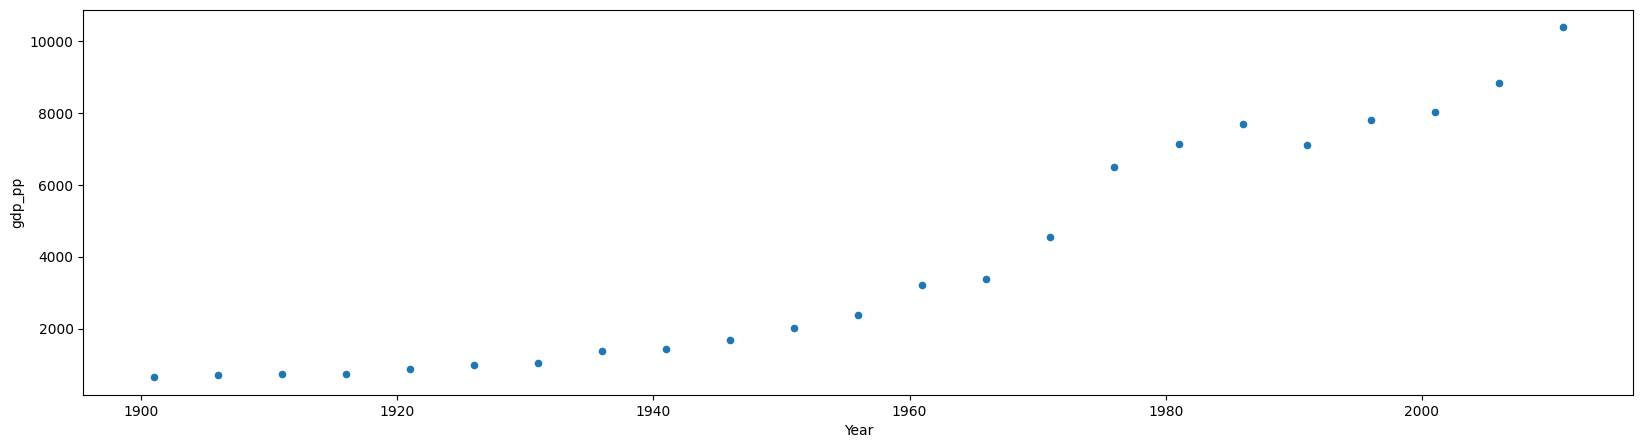

In [115]:
# ESSE CODIGO SUBSCREVE A TABELA NAO EXECUTAR ELE


# fazer um grafico com valor estimado e valor real, para analise se faz sentido 
# importar o matplotlib para gerar grafico
# gerar uma figura e um eixo fig, ax

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5)) # size fig

# criar uma variavel
country = "Brazil"

# fazer o plot
df_gdp = df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)

<Axes: xlabel='Year', ylabel='gdp_pp'>

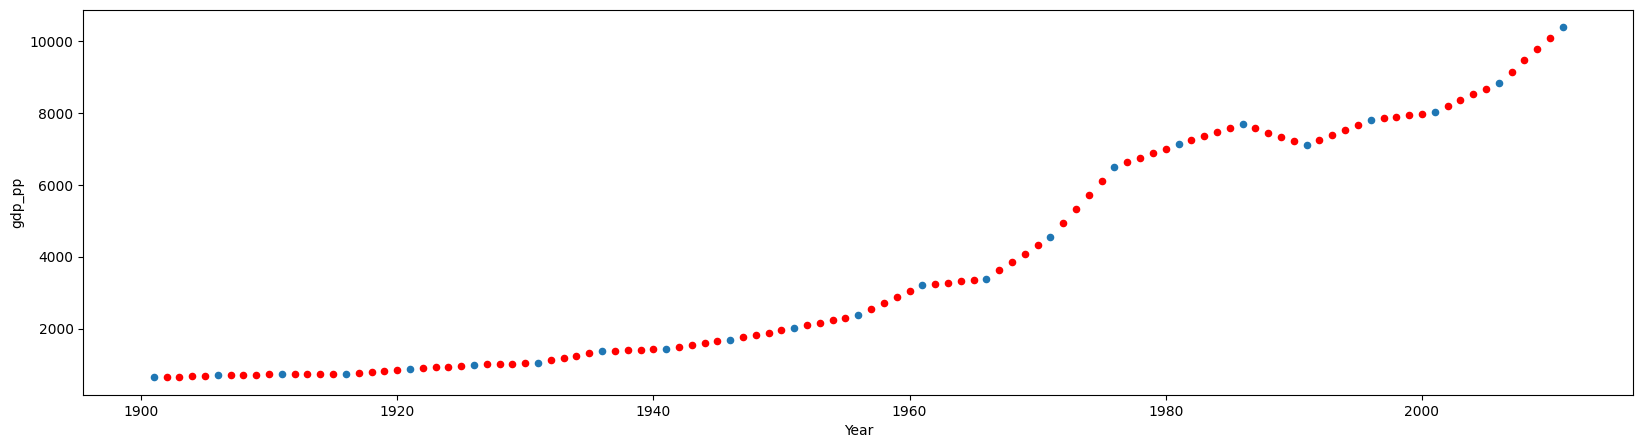

In [195]:
# fazer um grafico com valor estimado e valor real, para analise se faz sentido 
# importar o matplotlib para gerar grafico
# gerar uma figura e um eixo fig, ax
# COM DADOS ESTIMATE EM RED NO GRAFIC

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5)) # size fig

# criar uma variavel
country = "Brazil"

# fazer o plot
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red")

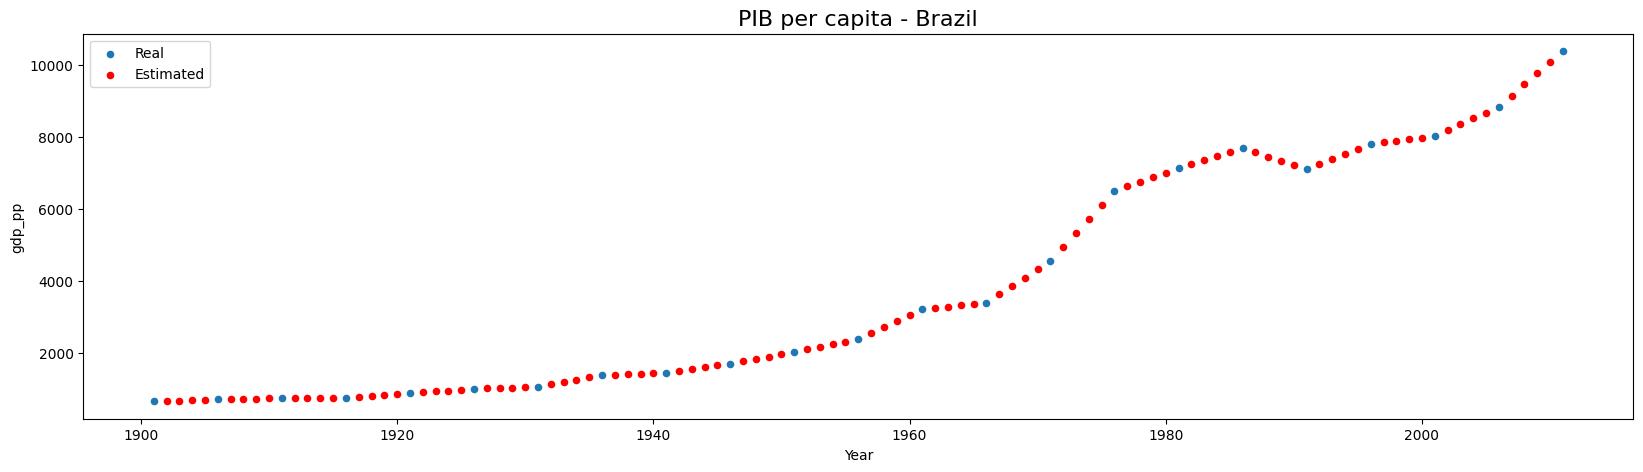

In [196]:
import matplotlib.pyplot as plt

# Cria figura e eixo
fig, ax = plt.subplots(figsize=(20, 5))

# Define o país
country = "Brazil"

# Dados reais (azul padrão)
df_gdp[(df_gdp["kind"] == "real") & (df_gdp["Country"] == country)] \
    .plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, label="Real")

# Dados estimados (vermelho)
df_gdp[(df_gdp["kind"] == "estimated") & (df_gdp["Country"] == country)] \
    .plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="red", label="Estimated")

# Título e legenda
ax.set_title(f"PIB per capita - {country}", fontsize=16)
ax.legend()


In [ ]:
# DESAFIOS!!!!

# 1 - - Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?
